<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [4]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

In [8]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts

# Step 1: Read the CSV file
# Assuming the CSV file is named 'dataset.csv'
dataset = pd.read_csv("./dataset.csv")

# Display the first few rows of the dataset to ensure it was read correctly
print("First few rows of the dataset:")
print(dataset.head())

# Step 2: Generate statistical description
# Using describe() to get basic statistics (for numerical columns)
print("\nStatistical Description of Numerical Columns:")
print(dataset.describe(include=[np.number]))

# Statistical info of Object/Categorical columns (count, unique counts)
print("\nInformation about Object/Categorical Columns:")
print(dataset.info())

# Additional details for object columns
print("\nDetailed information about Object/Categorical Columns:")
for column in dataset.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {column}")
    print(dataset[column].value_counts(dropna=False))
    print("Unique values:\n", dataset[column].unique)

First few rows of the dataset:
   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          35.560            1.6       8             256       1.60    978  
1          39.624            2.0       4             256       2.20    634  
2          39.624            2.7       8             256       2.20    946  
3          33.782            1.6       8             128       1.22   1244  
4          39.624            1.8       8             256       1.91    837  

Statistical Description of Numerical Columns:
       Unnamed: 0    Category         G

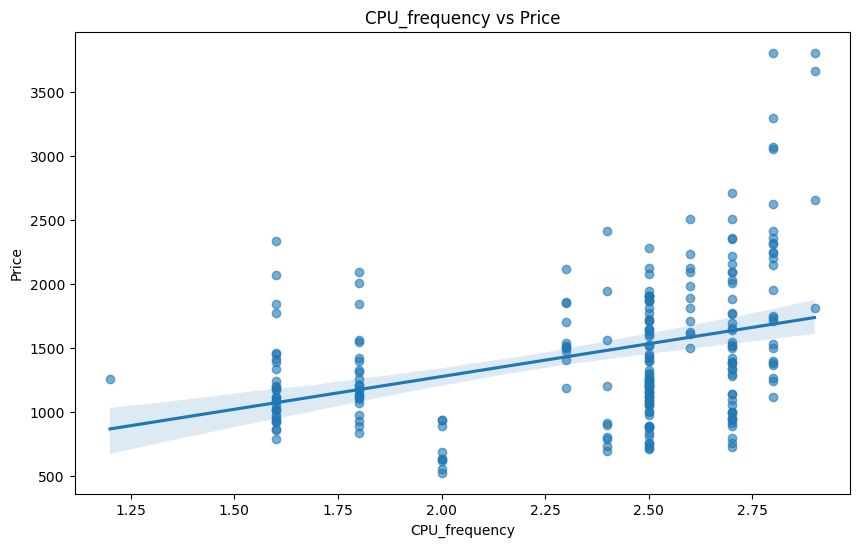

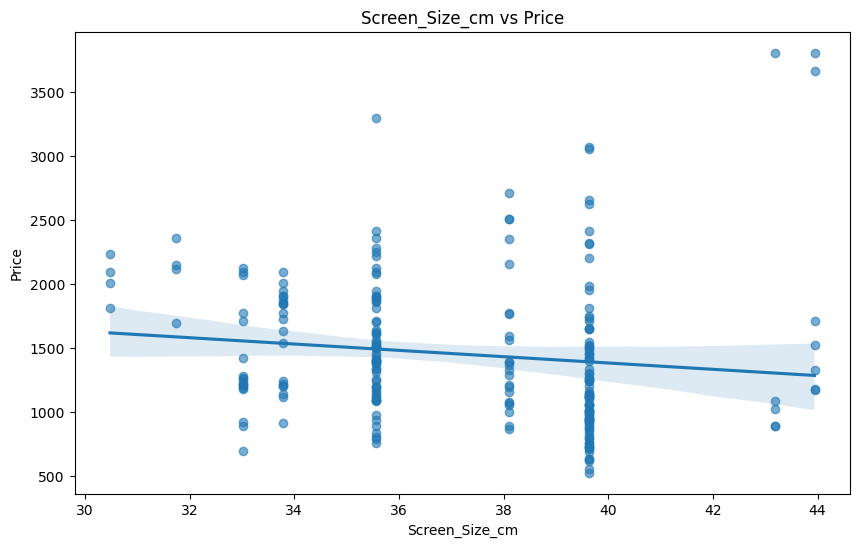

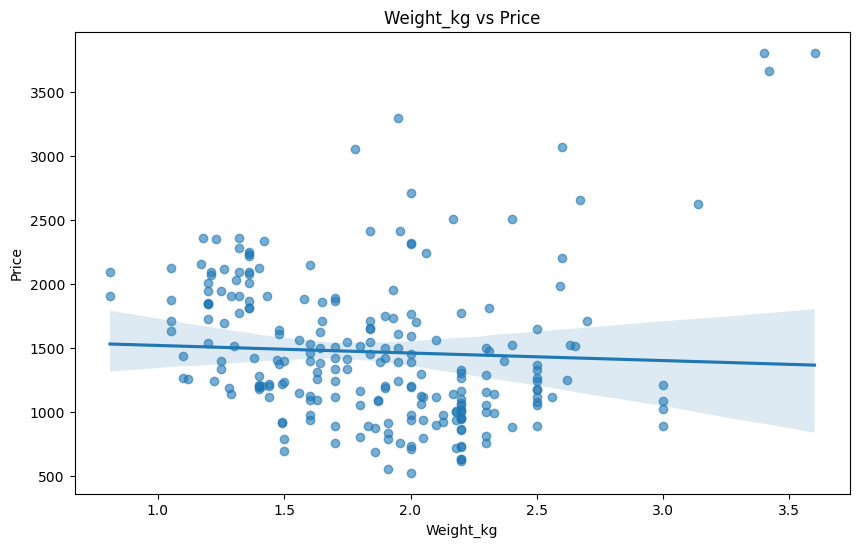

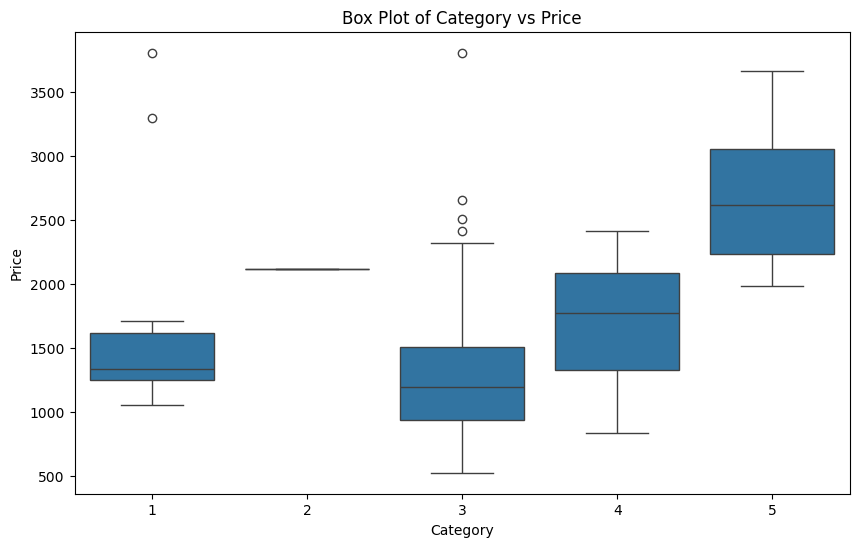

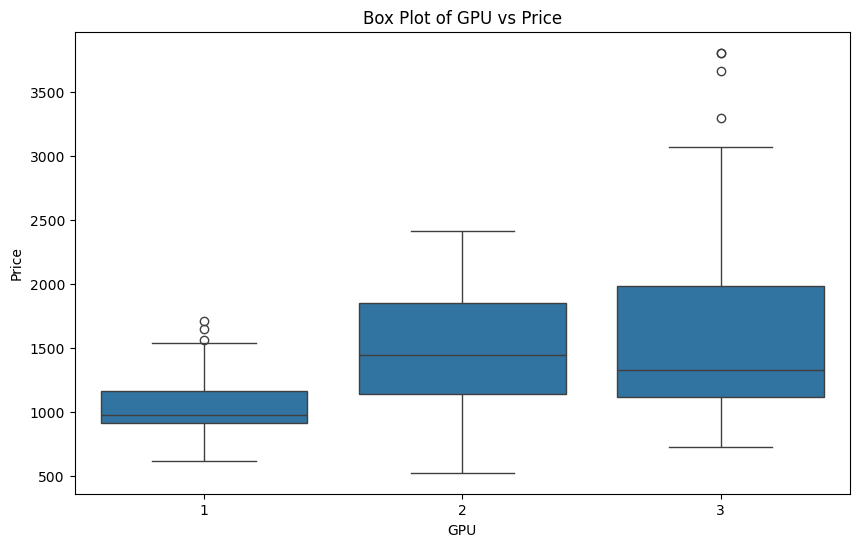

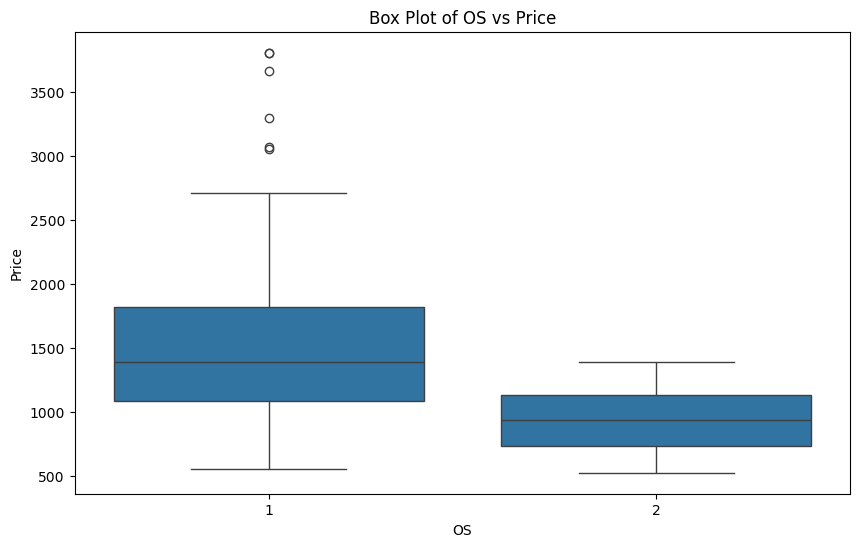

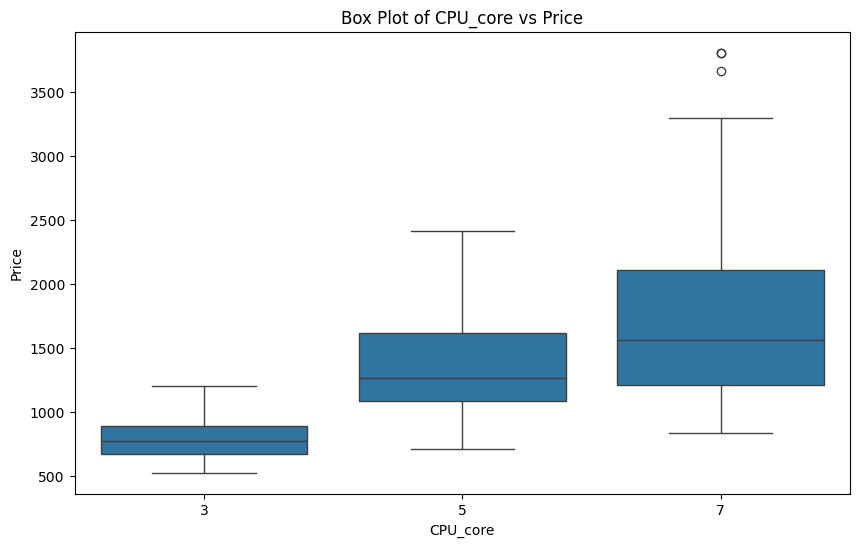

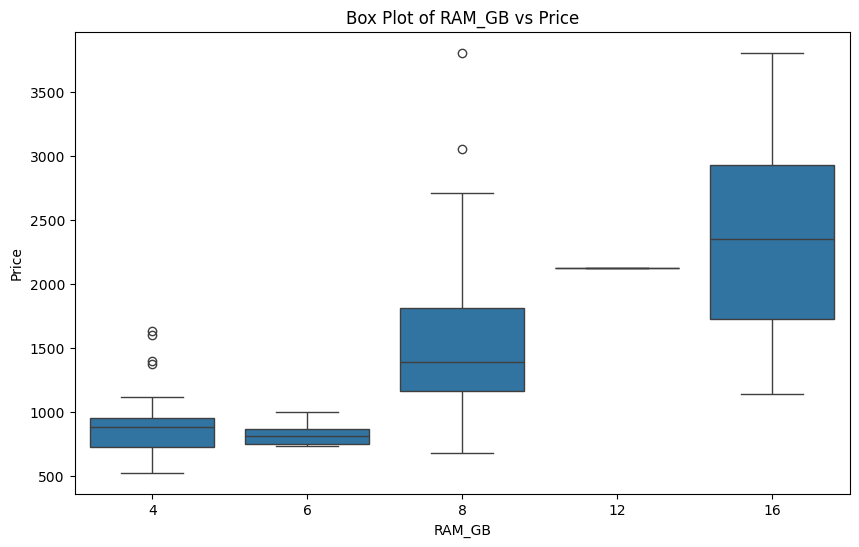

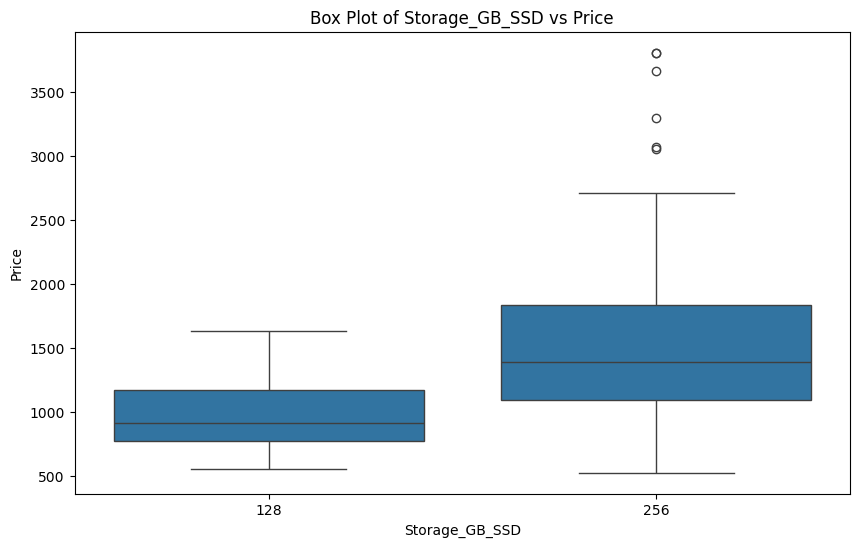

In [9]:
#Plotting 
# Step 1: Regression Plots
# List of features to plot against Price
features_to_plot = ["CPU_frequency", "Screen_Size_cm", "Weight_kg"]

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=feature, y="Price", data=dataset, scatter_kws={'alpha': 0.6})
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

# Step 2: Box Plots
category_features = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]

for feature in category_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y="Price", data=dataset)
    plt.title(f'Box Plot of {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [11]:
# Step 1: Extract numerical columns and target variable 'Price'
numerical_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
target = "Price"

# Step 2: Exclude the target variable from itself
numerical_cols.remove(target)

# Step 3: Inspect for NaNs and Infs in the numerical columns
print("\nInspecting for NaNs and Infs...")
for col in numerical_cols:
    missing_count = dataset[col].isnull().sum()
    inf_count = np.isinf(dataset[col]).sum()
    print(f"Column: {col} - Missing: {missing_count}, Infs: {inf_count}")

# Step 4: Robust Data Cleaning
# Drop rows with NaN or inf values
dataset = dataset.dropna(subset=numerical_cols + [target])

# Impute NaN values with the median and cap infinite values
for col in numerical_cols:
    if dataset[col].dtype in [np.float64, np.int64]:
        # Fill NaNs with the median
        dataset[col].fillna(dataset[col].median(), inplace=True)
        # Cap Infs
        dataset[col] = np.where(np.isinf(dataset[col]), np.nan, dataset[col])
        dataset[col] = np.where(dataset[col] > 1e9, 1e9, dataset[col])  # Example threshold (adjust as needed)
        dataset[col] = np.where(dataset[col] < -1e9, -1e9, dataset[col])  # Example threshold (adjust as needed)

# Step 5: Inspect cleaned dataset for NaNs and Infs
print("\nData cleaned: Inspecting for remaining NaNs and Infs...")
for col in numerical_cols:
    missing_count = dataset[col].isnull().sum()
    inf_count = np.isinf(dataset[col]).sum()
    print(f"Column: {col} - Missing: {missing_count}, Infs: {inf_count}")


Inspecting for NaNs and Infs...
Column: Unnamed: 0 - Missing: 0, Infs: 0
Column: Category - Missing: 0, Infs: 0
Column: GPU - Missing: 0, Infs: 0
Column: OS - Missing: 0, Infs: 0
Column: CPU_core - Missing: 0, Infs: 0
Column: Screen_Size_cm - Missing: 4, Infs: 0
Column: CPU_frequency - Missing: 0, Infs: 0
Column: RAM_GB - Missing: 0, Infs: 0
Column: Storage_GB_SSD - Missing: 0, Infs: 0
Column: Weight_kg - Missing: 5, Infs: 0


<ipython-input-11-2cbc6393d75d>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
<ipython-input-11-2cbc6393d75d>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'


Data cleaned: Inspecting for remaining NaNs and Infs...
Column: Unnamed: 0 - Missing: 0, Infs: 0
Column: Category - Missing: 0, Infs: 0
Column: GPU - Missing: 0, Infs: 0
Column: OS - Missing: 0, Infs: 0
Column: CPU_core - Missing: 0, Infs: 0
Column: Screen_Size_cm - Missing: 0, Infs: 0
Column: CPU_frequency - Missing: 0, Infs: 0
Column: RAM_GB - Missing: 0, Infs: 0
Column: Storage_GB_SSD - Missing: 0, Infs: 0
Column: Weight_kg - Missing: 0, Infs: 0


In [12]:
# Select numerical attributes
numerical_attributes = dataset.select_dtypes(include=np.number)
# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')
# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []
for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], dataset['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)
# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values,\
                           'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})
# Print the results
print(results_df)

                     Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0          Unnamed: 0           0.308799             0.308799   
Category              Category           0.263302             0.263302   
GPU                        GPU           0.290442             0.290442   
OS                          OS          -0.212871            -0.212871   
CPU_core              CPU_core           0.472225             0.472225   
Screen_Size_cm  Screen_Size_cm          -0.131664            -0.131664   
CPU_frequency    CPU_frequency           0.389075             0.389075   
RAM_GB                  RAM_GB           0.573947             0.573947   
Storage_GB_SSD  Storage_GB_SSD           0.246707             0.246707   
Weight_kg            Weight_kg          -0.039999            -0.039999   

                     P-value  
Unnamed: 0      1.894560e-06  
Category        5.481466e-05  
GPU             7.902140e-06  
OS              1.191417e-03  
CPU_core        4.035641e-14  


Pivot Table:

                    Price
GPU CPU_core             
1.0 3.0        769.250000
    5.0        998.500000
    7.0       1185.266667
2.0 3.0        785.076923
    5.0       1449.682927
    7.0       1736.666667
3.0 3.0        784.000000
    5.0       1236.666667
    7.0       1937.725000


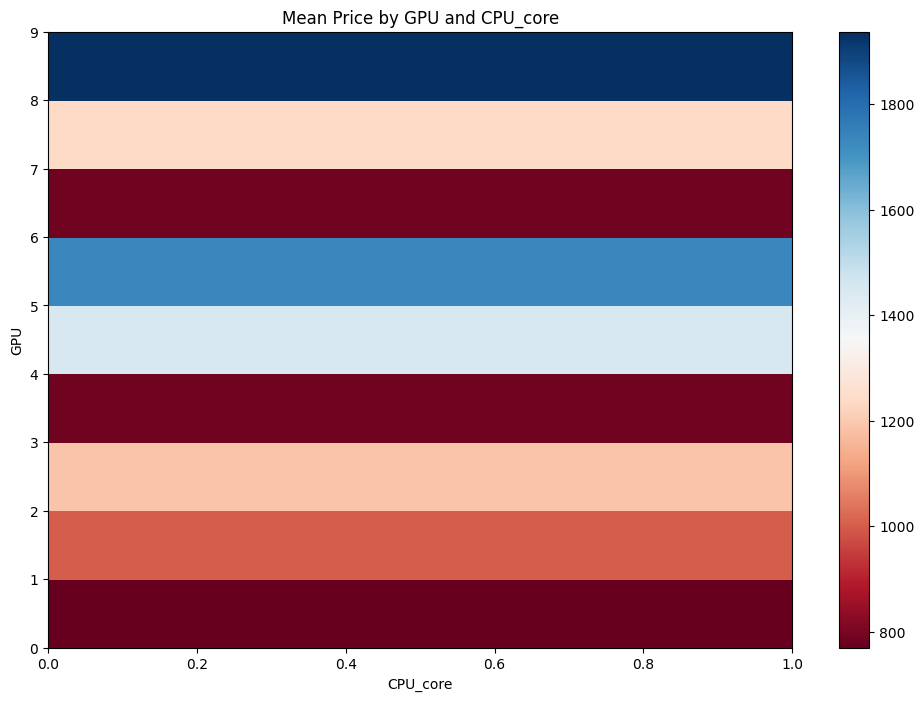

In [14]:
# Assuming the DataFrame 'df' is already loaded with the required columns

# Step 1: Create a pivot table
pivot_table = pd.pivot_table(dataset, 
                              values='Price', 
                              index=['GPU', 'CPU_core'], 
                              aggfunc='mean', 
                              fill_value=0)

# Display the pivot table
print("\nPivot Table:\n")
print(pivot_table)

# Step 2: Create a pcolor plot
plt.figure(figsize=(12, 8))

# Use pcolormesh for heatmap-like visualization
plt.pcolor(pivot_table, cmap ='RdBu')
# cax = plt.pcolormesh(pivot_table.index.get_level_values(0).values,
#                  pivot_table.index.get_level_values(1).values,
#                  pivot_table.values,
#                  cmap='viridis',
#                  shading='auto')

# Add colorbar
plt.colorbar() #cax

# Customize plot appearance
plt.xlabel('CPU_core')
plt.ylabel('GPU')
plt.title('Mean Price by GPU and CPU_core')

# Format and display plot
plt.show()

### My comments:
----
#### Practicing with Gen AI:
In this script, we are practicing how generative AI prompts work, such that it can generate code according to your needs.
In this example, we try to get data insights from a given dataset to make this process quicker and more efficient. We try to get insights with statistical descriptions, correlative insights, and some plottting usng Gen AI prompts.

The AI generated code is written based on specific prompts that were given to it by me, based on the instructions specified in the lab:

**Examples of The prompts that were given to the AI (IBM Granite 3.2 8B(Reasoning)):**

**prompt 1:**

```
Write a python code to perform the following actions.
1. Import a data set from a CSV file, The headers for the data set must be in the first row of the CSV file.
2. Generate the statistical description of all the features used in the data set. Include "object" data types as well.
```

**prompt 2:** 
```
Write a Python code to perform the following actions.
1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".
```

**prompt 3:**
```
Write a Python code for the following.
1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
2. Don't include the values evaluated for target variable against itself.
3. Print these values as a part of a single dataframe against each individual attribute.
```
**prompt 4:**
```
Write a python code that performs the following actions.
1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
3. Plot a pcolor plot for this pivot table.
```
#### For prompt 4 it actually tries to give code with some more lines (which did not work) instead of keeping it simple for example it gave this for the plt.pcolormesh:
```python
cax = plt.pcolormesh(pivot_table.index.get_level_values(0).values,
                  pivot_table.index.get_level_values(1).values,
                  pivot_table.values,
                  cmap='viridis',
                  shading='auto')
plt.colorbar(cax)                  
```
whereas this easier solution worked for this situation:
```python
plt.pcolor(pivot_table, cmap ='RdBu')
plt.colorbar()
```

#### Overall, It does the job well enough for the example or the tasks required for this lab.

----

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
